In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
#from scipy import signal
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import mpld3
#import mpl_scatter_density # adds projection='scatter_density'
#import datashader as ds
#from datashader.mpl_ext import dsshow

In [2]:
airport_rain_df_3 = pd.read_csv('./sitka_data/Airport_new/cleaned_data/airport_cleaned_3_hour_wind.csv', low_memory=False)
airport_rain_df_3.rename({'precip_accum_one_hour_mm': 'airport_rain_3'}, axis='columns', inplace=True)
usgs_rain_df_3 = pd.read_csv('./sitka_data/USGS_new/cleaned_data/usgs_cleaned_both_pits_3_hour_dt_redo.csv', low_memory=False)
usgs_rain_df_3.rename({'Sitka_rain_mm_Tot': 'usgs_rain_3'}, axis='columns', inplace=True)
usgs_rain_df_3.rename({'Sitka_ec5_vwc_sp1_50cm_mean': 'sp1_vwc_50_mean'}, axis='columns', inplace=True)
usgs_rain_df_3.rename({'Sitka_ec5_vwc_sp1_50cm_max': 'sp1_vwc_50_max'}, axis='columns', inplace=True)
usgs_rain_df_3.rename({'Sitka_ec5_vwc_sp1_50cm_dt': 'sp1_vwc_50_dt'}, axis='columns', inplace=True)
usgs_rain_df_3.rename({'Sitka_ec5_vwc_sp1_25cm_mean': 'sp1_vwc_25_mean'}, axis='columns', inplace=True)
usgs_rain_df_3.rename({'Sitka_ec5_vwc_sp1_25cm_max': 'sp1_vwc_25_max'}, axis='columns', inplace=True)
usgs_rain_df_3.rename({'Sitka_ec5_vwc_sp1_25cm_dt': 'sp1_vwc_25_dt'}, axis='columns', inplace=True)
usgs_rain_df_3.rename({'Sitka_waterPressure_psig_sp1_55cm_mean': 'sp1_pp_mean'}, axis='columns', inplace=True)
usgs_rain_df_3.rename({'Sitka_waterPressure_psig_sp1_55cm_max': 'sp1_pp_max'}, axis='columns', inplace=True)
usgs_rain_df_3.rename({'Sitka_waterPressure_psig_sp1_55cm_dt': 'sp1_pp_dt'}, axis='columns', inplace=True)
usgs_rain_df_3.rename({'Sitka_ec5_vwc_sp2_40cm_mean': 'sp2_vwc_40_mean'}, axis='columns', inplace=True)
usgs_rain_df_3.rename({'Sitka_ec5_vwc_sp2_40cm_max': 'sp2_vwc_40_max'}, axis='columns', inplace=True)
usgs_rain_df_3.rename({'Sitka_ec5_vwc_sp2_40cm_dt': 'sp2_vwc_40_dt'}, axis='columns', inplace=True)
usgs_rain_df_3.rename({'Sitka_ec5_vwc_sp2_20cm_mean': 'sp2_vwc_20_mean'}, axis='columns', inplace=True)
usgs_rain_df_3.rename({'Sitka_ec5_vwc_sp2_20cm_max': 'sp2_vwc_20_max'}, axis='columns', inplace=True)
usgs_rain_df_3.rename({'Sitka_ec5_vwc_sp2_20cm_dt': 'sp2_vwc_20_dt'}, axis='columns', inplace=True)
usgs_rain_df_3.rename({'Sitka_waterPressure_psig_sp2_60cm_mean': 'sp2_pp_mean'}, axis='columns', inplace=True)
usgs_rain_df_3.rename({'Sitka_waterPressure_psig_sp2_60cm_max': 'sp2_pp_max'}, axis='columns', inplace=True)
usgs_rain_df_3.rename({'Sitka_waterPressure_psig_sp2_60cm_dt': 'sp2_pp_dt'}, axis='columns', inplace=True)


In [3]:
airport_rain_df_3

,Date_Time,wind_speed_meter_sec,wind_direction_x,wind_direction_y,airport_rain_3
0,2002-11-06 06:00:00,6.690000,0.984808,-0.173648,0.000
1,2002-11-06 09:00:00,9.770000,0.939693,-0.342020,0.000
2,2002-11-06 12:00:00,8.860000,0.672951,-0.652663,3.048
3,2002-11-06 15:00:00,4.743333,0.564370,-0.748878,1.778
4,2002-11-06 18:00:00,2.515556,0.637579,0.142455,0.508
...,...,...,...,...,...
59541,2023-03-23 21:00:00,1.293413,0.999048,0.000000,0.533
59542,2023-03-24 00:00:00,NaN,NaN,NaN,0.000
59543,2023-03-24 03:00:00,NaN,NaN,NaN,0.000
59544,2023-03-24 06:00:00,NaN,NaN,NaN,0.000


In [3]:
usgs_rain_df_3 = usgs_rain_df_3[usgs_rain_df_3["Date_Time"]>="2020-06-09 21:00:00"]

In [4]:
combined_rain_df_3 = pd.merge(usgs_rain_df_3, airport_rain_df_3, how="left", on="Date_Time")
combined_rain_df_3.dropna(subset=["usgs_rain_3", "airport_rain_3"], inplace=True)

In [1]:
# combined_rain_df_3

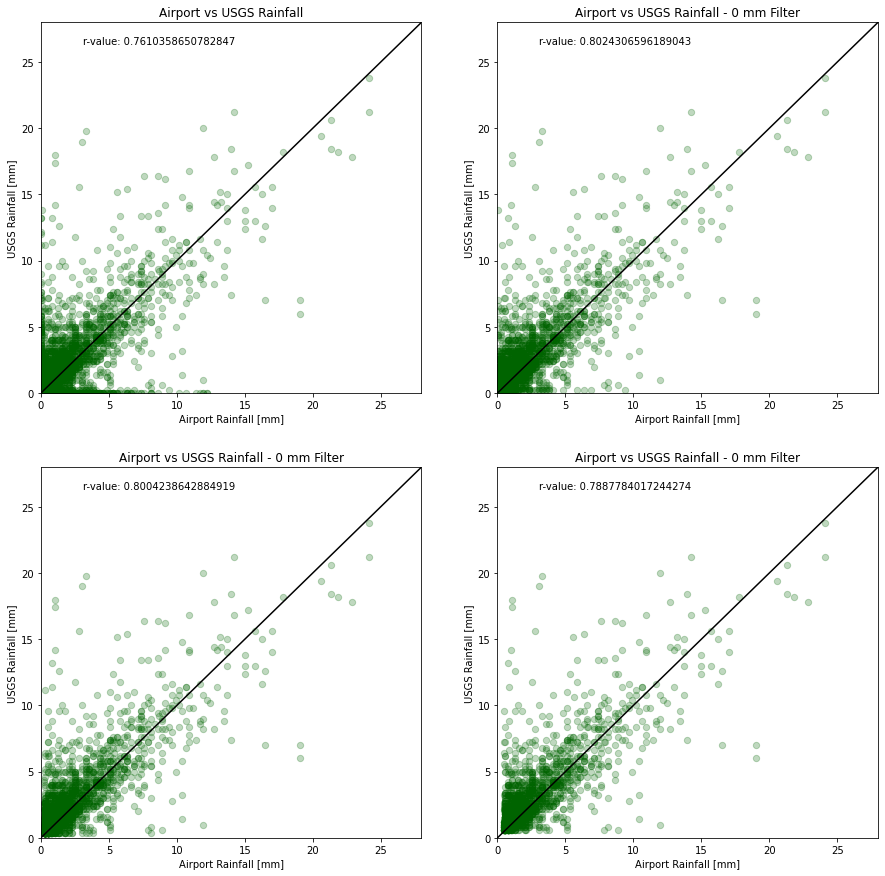

In [8]:
box_size_3 = 28
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2, figsize =(15, 15)) 

ax1.scatter(combined_rain_df_3["airport_rain_3"], combined_rain_df_3["usgs_rain_3"], c='darkgreen', s=40, alpha=.25)
ax1.set_title("Airport vs USGS Rainfall")
ax1.set_xlabel("Airport Rainfall [mm]")
ax1.set_ylabel("USGS Rainfall [mm]")
ax1.set_xlim([0,box_size_3])
ax1.set_ylim([0,box_size_3])
ax1.text(.11*box_size_3, .94*box_size_3, "r-value: "+str(combined_rain_df_3["airport_rain_3"].corr(combined_rain_df_3["usgs_rain_3"])))
ax1.axline((0, 0), slope=1, c='k')

ax2.scatter(combined_rain_df_3["airport_rain_3"].where(combined_rain_df_3["airport_rain_3"]>0), combined_rain_df_3["usgs_rain_3"].where(combined_rain_df_3["usgs_rain_3"]>0), c='darkgreen', s=40, alpha=.25)
ax2.set_title("Airport vs USGS Rainfall - 0 mm Filter")
ax2.set_xlabel("Airport Rainfall [mm]")
ax2.set_ylabel("USGS Rainfall [mm]")
ax2.set_xlim([0,box_size_3])
ax2.set_ylim([0,box_size_3])
ax2.text(.11*box_size_3, .94*box_size_3, "r-value: "+str(combined_rain_df_3["airport_rain_3"].where(combined_rain_df_3["airport_rain_3"]>0).corr(combined_rain_df_3["usgs_rain_3"].where(combined_rain_df_3["usgs_rain_3"]>0))))
ax2.axline((0, 0), slope=1, c='k')



ax3.scatter(combined_rain_df_3["airport_rain_3"].where(combined_rain_df_3["airport_rain_3"]>0.2), combined_rain_df_3["usgs_rain_3"].where(combined_rain_df_3["usgs_rain_3"]>0.2), c='darkgreen', s=40, alpha=.25)
ax3.set_title("Airport vs USGS Rainfall - 0 mm Filter")
ax3.set_xlabel("Airport Rainfall [mm]")
ax3.set_ylabel("USGS Rainfall [mm]")
ax3.set_xlim([0,box_size_3])
ax3.set_ylim([0,box_size_3])
ax3.text(.11*box_size_3, .94*box_size_3, "r-value: "+str(combined_rain_df_3["airport_rain_3"].where(combined_rain_df_3["airport_rain_3"]>0.2).corr(combined_rain_df_3["usgs_rain_3"].where(combined_rain_df_3["usgs_rain_3"]>0.2))))
ax3.axline((0, 0), slope=1, c='k')




ax4.scatter(combined_rain_df_3["airport_rain_3"].where(combined_rain_df_3["airport_rain_3"]>0.5), combined_rain_df_3["usgs_rain_3"].where(combined_rain_df_3["usgs_rain_3"]>0.5), c='darkgreen', s=40, alpha=.25)
ax4.set_title("Airport vs USGS Rainfall - 0 mm Filter")
ax4.set_xlabel("Airport Rainfall [mm]")
ax4.set_ylabel("USGS Rainfall [mm]")
ax4.set_xlim([0,box_size_3])
ax4.set_ylim([0,box_size_3])
ax4.text(.11*box_size_3, .94*box_size_3, "r-value: "+str(combined_rain_df_3["airport_rain_3"].where(combined_rain_df_3["airport_rain_3"]>0.5).corr(combined_rain_df_3["usgs_rain_3"].where(combined_rain_df_3["usgs_rain_3"]>0.5))))
ax4.axline((0, 0), slope=1, c='k')

#plt.savefig('./sitka_data/comparison_figs/airport_usgs_comparison_with_0_mm_filter.png')
plt.show()

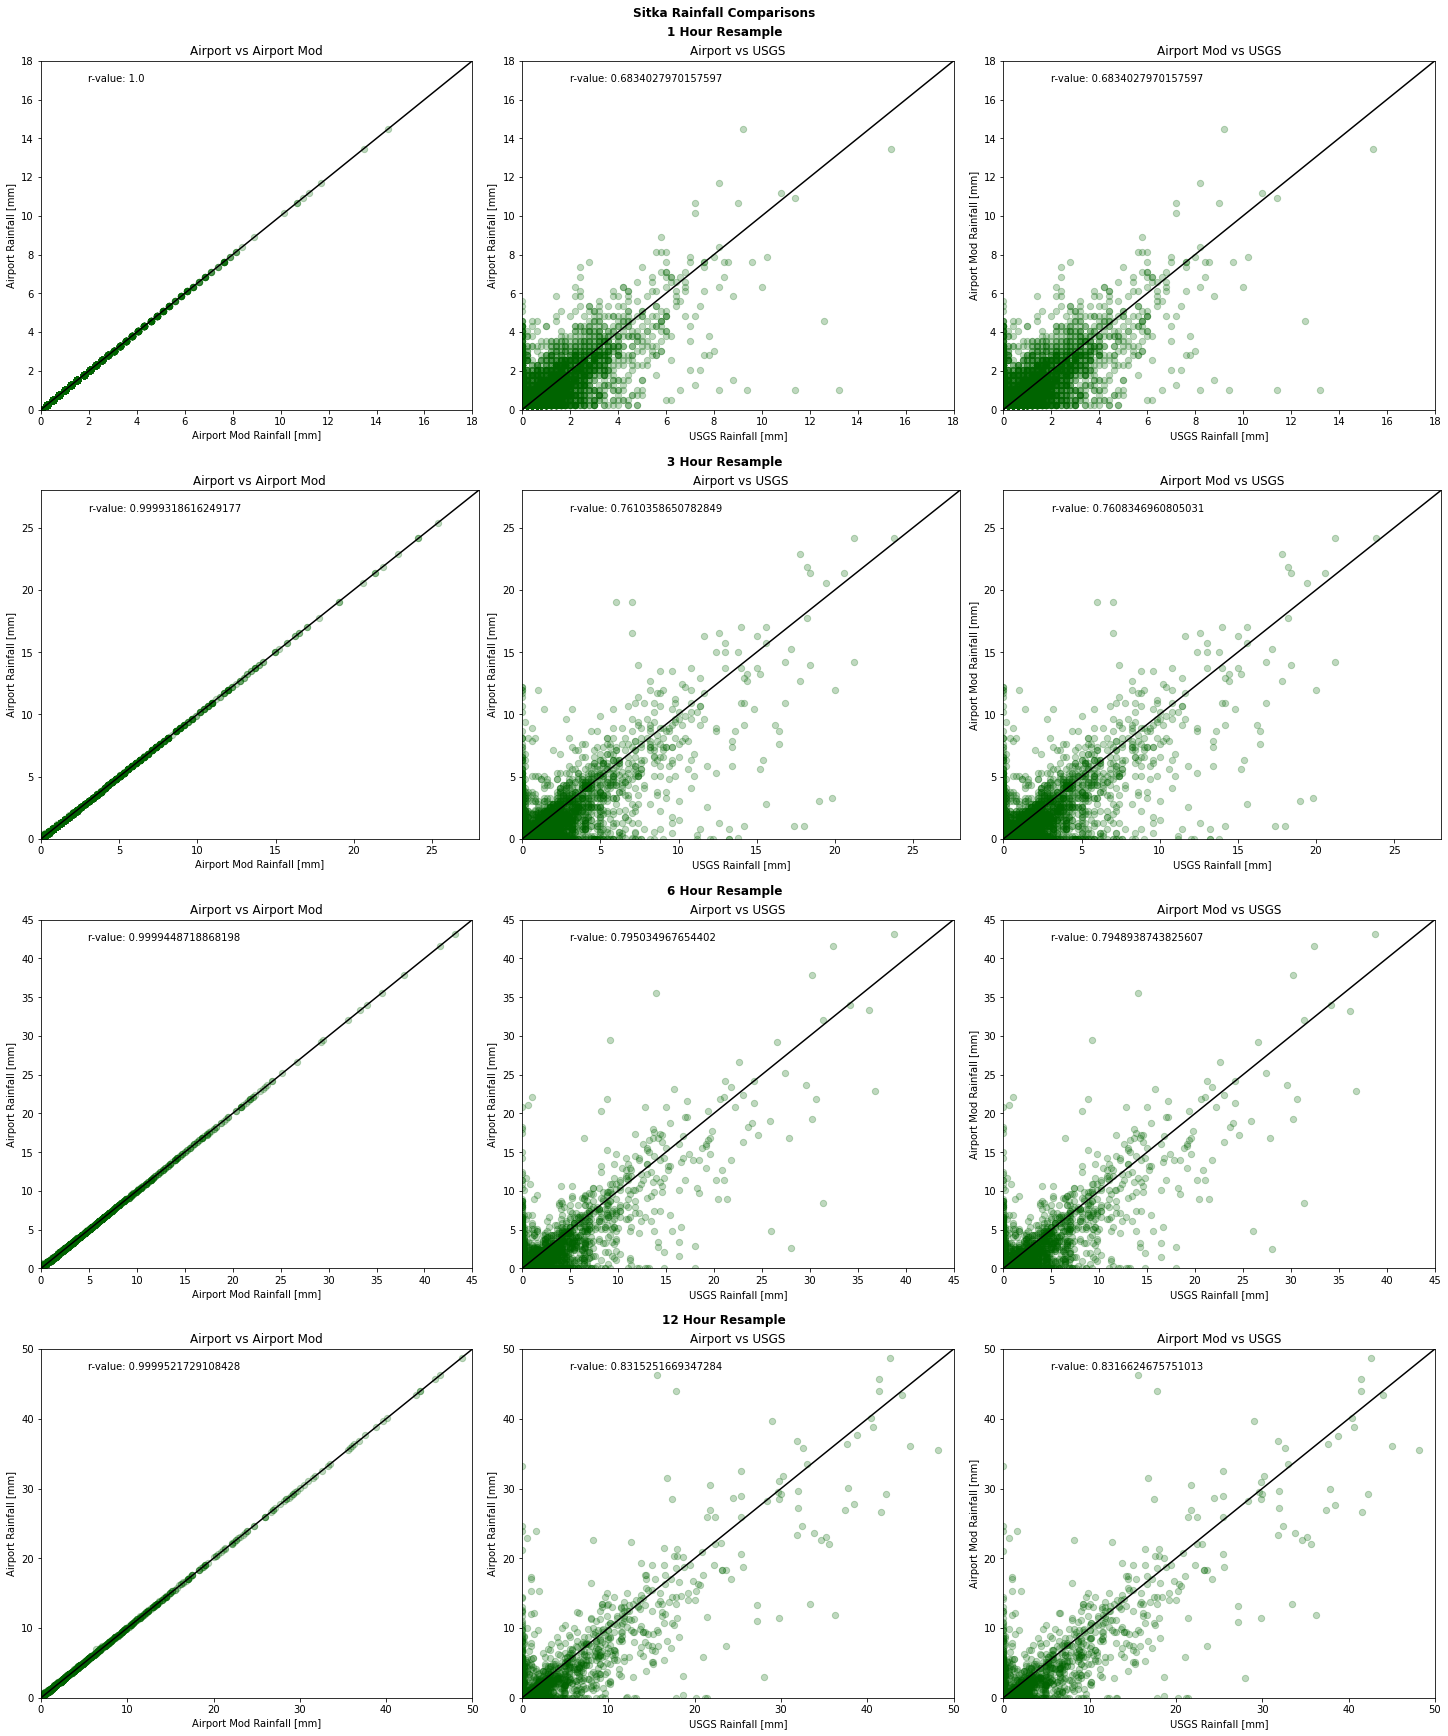

In [13]:
box_size_1 = 18
box_size_3 = 28
box_size_6 = 45
box_size_12 = 50

rows=4
cols=3

fig = plt.figure(figsize =(20, 24), constrained_layout=True) 
fig.suptitle('Sitka Rainfall Comparisons', fontweight="bold")

[row1, row2, row3, row4] = fig.subfigures(nrows=rows,ncols=1)
[ax1, ax2, ax3] = row1.subplots(nrows=1,ncols=cols)
[ax4, ax5, ax6] = row2.subplots(nrows=1,ncols=cols)
[ax7, ax8, ax9] = row3.subplots(nrows=1,ncols=cols)
[ax10, ax11, ax12] = row4.subplots(nrows=1,ncols=cols)

row1.suptitle('1 Hour Resample', fontweight="bold")
ax1.scatter(diff_rain_1["airport_rain_1_mod"], diff_rain_1["airport_rain_1"], c='darkgreen', s=40, alpha=.25)
ax1.set_title("Airport vs Airport Mod"); ax1.set_ylabel("Airport Rainfall [mm]"); ax1.set_xlabel("Airport Mod Rainfall [mm]")
ax1.set_xlim([0,box_size_1]); ax1.set_ylim([0,box_size_1])
ax1.text(.11*box_size_1, .94*box_size_1, "r-value: "+str(diff_rain_1["airport_rain_1_mod"]. corr(diff_rain_1["airport_rain_1"])))
ax1.axline((0, 0), slope=1, c='k')

ax2.scatter(combined_rain_df_1["usgs_rain_1"], combined_rain_df_1["airport_rain_1"], c='darkgreen', s=40, alpha=.25)
ax2.set_title("Airport vs USGS"); ax2.set_ylabel("Airport Rainfall [mm]"); ax2.set_xlabel("USGS Rainfall [mm]")
ax2.set_xlim([0,box_size_1]); ax2.set_ylim([0,box_size_1])
ax2.text(.11*box_size_1, .94*box_size_1, "r-value: "+str(combined_rain_df_1["usgs_rain_1"]. corr(combined_rain_df_1["airport_rain_1"])))
ax2.axline((0, 0), slope=1, c='k')

ax3.scatter(combined_rain_df_1["usgs_rain_1"], combined_rain_df_1["airport_rain_1_mod"], c='darkgreen', s=40, alpha=.25)
ax3.set_title("Airport Mod vs USGS"); ax3.set_ylabel("Airport Mod Rainfall [mm]"); ax3.set_xlabel("USGS Rainfall [mm]")
ax3.set_xlim([0,box_size_1]); ax3.set_ylim([0,box_size_1])
ax3.text(.11*box_size_1, .94*box_size_1, "r-value: "+str(combined_rain_df_1["usgs_rain_1"]. corr(combined_rain_df_1["airport_rain_1_mod"])))
ax3.axline((0, 0), slope=1, c='k')

row2.suptitle('3 Hour Resample', fontweight="bold")
ax4.scatter(diff_rain_3["airport_rain_3_mod"], diff_rain_3["airport_rain_3"], c='darkgreen', s=40, alpha=.25)
ax4.set_title("Airport vs Airport Mod"); ax4.set_ylabel("Airport Rainfall [mm]"); ax4.set_xlabel("Airport Mod Rainfall [mm]")
ax4.set_xlim([0,box_size_3]); ax4.set_ylim([0,box_size_3])
ax4.text(.11*box_size_3, .94*box_size_3, "r-value: "+str(diff_rain_3["airport_rain_3_mod"]. corr(diff_rain_3["airport_rain_3"])))
ax4.axline((0, 0), slope=1, c='k')

ax5.scatter(combined_rain_df_3["usgs_rain_3"], combined_rain_df_3["airport_rain_3"], c='darkgreen', s=40, alpha=.25)
ax5.set_title("Airport vs USGS"); ax5.set_ylabel("Airport Rainfall [mm]"); ax5.set_xlabel("USGS Rainfall [mm]")
ax5.set_xlim([0,box_size_3]); ax5.set_ylim([0,box_size_3])
ax5.text(.11*box_size_3, .94*box_size_3, "r-value: "+str(combined_rain_df_3["usgs_rain_3"]. corr(combined_rain_df_3["airport_rain_3"])))
ax5.axline((0, 0), slope=1, c='k')

ax6.scatter(combined_rain_df_3["usgs_rain_3"], combined_rain_df_3["airport_rain_3_mod"], c='darkgreen', s=40, alpha=.25)
ax6.set_title("Airport Mod vs USGS"); ax6.set_ylabel("Airport Mod Rainfall [mm]"); ax6.set_xlabel("USGS Rainfall [mm]")
ax6.set_xlim([0,box_size_3]); ax6.set_ylim([0,box_size_3])
ax6.text(.11*box_size_3, .94*box_size_3, "r-value: "+str(combined_rain_df_3["usgs_rain_3"]. corr(combined_rain_df_3["airport_rain_3_mod"])))
ax6.axline((0, 0), slope=1, c='k')

row3.suptitle('6 Hour Resample', fontweight="bold")
ax7.scatter(combined_rain_df_6["airport_rain_6_mod"], combined_rain_df_6["airport_rain_6"], c='darkgreen', s=40, alpha=.25)
ax7.set_title("Airport vs Airport Mod"); ax7.set_ylabel("Airport Rainfall [mm]"); ax7.set_xlabel("Airport Mod Rainfall [mm]")
ax7.set_xlim([0,box_size_6]); ax7.set_ylim([0,box_size_6])
ax7.text(.11*box_size_6, .94*box_size_6, "r-value: "+str(diff_rain_6["airport_rain_6_mod"]. corr(diff_rain_6["airport_rain_6"])))
ax7.axline((0, 0), slope=1, c='k')

ax8.scatter(combined_rain_df_6["usgs_rain_6"], combined_rain_df_6["airport_rain_6"], c='darkgreen', s=40, alpha=.25)
ax8.set_title("Airport vs USGS"); ax8.set_ylabel("Airport Rainfall [mm]"); ax8.set_xlabel("USGS Rainfall [mm]")
ax8.set_xlim([0,box_size_6]); ax8.set_ylim([0,box_size_6])
ax8.text(.11*box_size_6, .94*box_size_6, "r-value: "+str(combined_rain_df_6["usgs_rain_6"]. corr(combined_rain_df_6["airport_rain_6"])))
ax8.axline((0, 0), slope=1, c='k')

ax9.scatter(combined_rain_df_6["usgs_rain_6"], combined_rain_df_6["airport_rain_6_mod"], c='darkgreen', s=40, alpha=.25)
ax9.set_title("Airport Mod vs USGS"); ax9.set_ylabel("Airport Mod Rainfall [mm]"); ax9.set_xlabel("USGS Rainfall [mm]")
ax9.set_xlim([0,box_size_6]); ax9.set_ylim([0,box_size_6])
ax9.text(.11*box_size_6, .94*box_size_6, "r-value: "+str(combined_rain_df_6["usgs_rain_6"]. corr(combined_rain_df_6["airport_rain_6_mod"])))
ax9.axline((0, 0), slope=1, c='k')

row4.suptitle('12 Hour Resample', fontweight="bold")
ax10.scatter(combined_rain_df_12["airport_rain_12_mod"], combined_rain_df_12["airport_rain_12"], c='darkgreen', s=40, alpha=.25)
ax10.set_title("Airport vs Airport Mod"); ax10.set_ylabel("Airport Rainfall [mm]"); ax10.set_xlabel("Airport Mod Rainfall [mm]")
ax10.set_xlim([0,box_size_12]); ax10.set_ylim([0,box_size_12])
ax10.text(.11*box_size_12, .94*box_size_12, "r-value: "+str(diff_rain_12["airport_rain_12_mod"]. corr(diff_rain_12["airport_rain_12"])))
ax10.axline((0, 0), slope=1, c='k')

ax11.scatter(combined_rain_df_12["usgs_rain_12"], combined_rain_df_12["airport_rain_12"], c='darkgreen', s=40, alpha=.25)
ax11.set_title("Airport vs USGS"); ax11.set_ylabel("Airport Rainfall [mm]"); ax11.set_xlabel("USGS Rainfall [mm]")
ax11.set_xlim([0,box_size_12]); ax11.set_ylim([0,box_size_12])
ax11.text(.11*box_size_12, .94*box_size_12, "r-value: "+str(combined_rain_df_12["usgs_rain_12"]. corr(combined_rain_df_12["airport_rain_12"])))
ax11.axline((0, 0), slope=1, c='k')

ax12.scatter(combined_rain_df_12["usgs_rain_12"], combined_rain_df_12["airport_rain_12_mod"], c='darkgreen', s=40, alpha=.25)
ax12.set_title("Airport Mod vs USGS"); ax12.set_ylabel("Airport Mod Rainfall [mm]"); ax12.set_xlabel("USGS Rainfall [mm]")
ax12.set_xlim([0,box_size_12]); ax12.set_ylim([0,box_size_12])
ax12.text(.11*box_size_12, .94*box_size_12, "r-value: "+str(combined_rain_df_12["usgs_rain_12"]. corr(combined_rain_df_12["airport_rain_12_mod"])))
ax12.axline((0, 0), slope=1, c='k')

#plt.savefig('./sitka_data/comparison_figs/4_3_rainfall_histograms.png', dpi='figure')
plt.show()

In [14]:
#combined_rain_df_1.plot(x="Date_Time", y=["airport_rain_1", "usgs_rain_1"], style=['ko','rx'], markersize=5, alpha=0.4, figsize=(15, 7))

# diff_rain_1.plot(x="Date_Time", y="DiffAirAirMod", style='ro', title="Airport 1 Hour Difference", figsize=(20, 6))
# diff_rain_3.plot(x="Date_Time", y="DiffAirAirMod", style='ro', title="Airport 3 Hour Difference", figsize=(20, 6))
# diff_rain_6.plot(x="Date_Time", y="DiffAirAirMod", style='ro', title="Airport 6 Hour Difference", figsize=(20, 6))
# diff_rain_12.plot(x="Date_Time", y="DiffAirAirMod", style='ro', title="Airport 12 Hour Difference", figsize=(20, 6))
#diff_rain_24.plot(x="Date_Time", y="DiffAirAirMod", style='ro', title="Airport 24 Hour Difference", figsize=(20, 6))

# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,7))
# combined_rain_df.plot(x="Date_Time", y="airport_rain", c='k', ax=axes[0])
# combined_rain_df.plot(x="Date_Time", y="usgs_rain", c='g', ax=axes[1])

In [15]:
# fig, axes = plt.subplots(3,1,figsize=(20,10))
# combined_rain_df_1.plot(x="Date_Time", y="airport_rain_1", c='k', ax=axes[0])
# combined_rain_df_1.plot(x="Date_Time", y="airport_rain_1_mod", c='g', ax=axes[1])
# combined_rain_df_1.plot(x="Date_Time", y="usgs_rain_1", c='g', ax=axes[2])

In [16]:
# fig, axes = plt.subplots(2,1,figsize=(20,10))
# combined_rain_df_1.plot(x="Date_Time", y="Sitka_waterPressure_psig_sp2_60cm_mean", c='k', ax=axes[0])
# combined_rain_df_1.plot(x="Date_Time", y="Sitka_waterPressure_psig_sp2_60cm_max", c='g', ax=axes[1])

In [17]:
# fig, axes = plt.subplots(5,1,figsize=(20,20))
# combined_rain_df_1.plot(x="Date_Time", y="Sitka_waterPressure_psig_sp2_60cm_max", c='k', ax=axes[0])
# combined_rain_df_3.plot(x="Date_Time", y="Sitka_waterPressure_psig_sp2_60cm_max", c='g', ax=axes[1])
# combined_rain_df_6.plot(x="Date_Time", y="Sitka_waterPressure_psig_sp2_60cm_max", c='g', ax=axes[2])
# combined_rain_df_12.plot(x="Date_Time", y="Sitka_waterPressure_psig_sp2_60cm_max", c='g', ax=axes[3])
# combined_rain_df_24.plot(x="Date_Time", y="Sitka_waterPressure_psig_sp2_60cm_max", c='g', ax=axes[4])

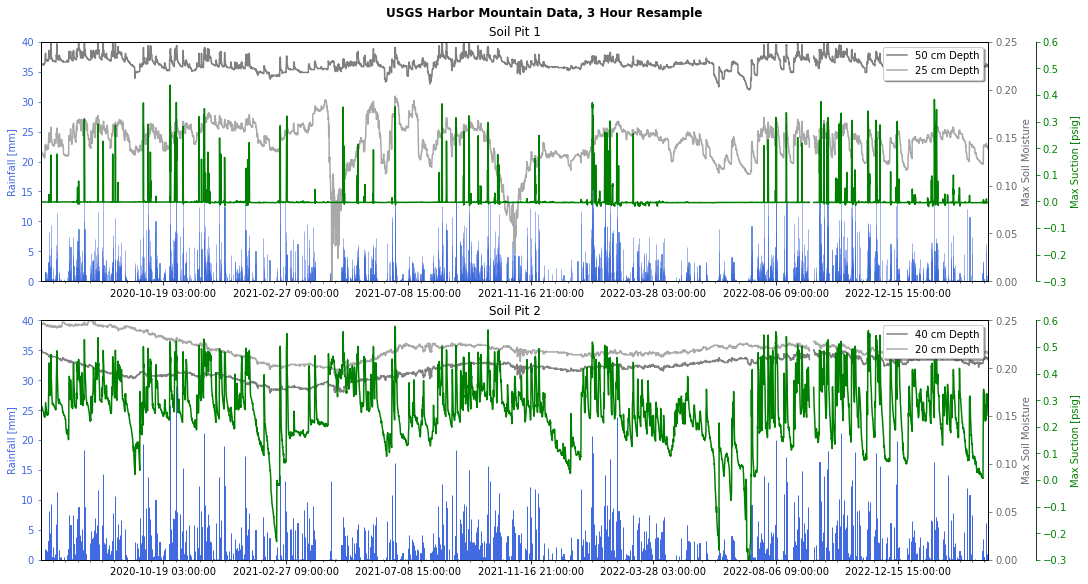

In [8]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(15,8), layout='constrained')
fig.patch.set_facecolor('white')
fig.suptitle('USGS Harbor Mountain Data, 3 Hour Resample', fontweight='bold')

ax1.set_title("Soil Pit 1")
ax1.bar(usgs_rain_df_3['Date_Time'], usgs_rain_df_3['usgs_rain_3'], alpha=1, edgecolor="royalblue", linewidth=.5, width=.8)
majorLocator   = MultipleLocator(1050)
minorLocator   = MultipleLocator(105)
ax1.xaxis.set_major_locator(majorLocator)
ax1.xaxis.set_minor_locator(minorLocator)
ax1.set_ylabel("Rainfall [mm]")
ax1.set_ylim([0,40])
ax1.set_xlim([usgs_rain_df_3['Date_Time'].iloc[1],usgs_rain_df_3['Date_Time'].iloc[-1]])

ax1b = ax1.twinx()
upper_vwc_1, = ax1b.plot(usgs_rain_df_3['Date_Time'], usgs_rain_df_3['sp1_vwc_50_max'], color='grey')#, linewidth=.5)
lower_vwc_1, = ax1b.plot(usgs_rain_df_3['Date_Time'], usgs_rain_df_3['sp1_vwc_25_max'], color='darkgrey')#, linewidth=.5)
ax1b.set_ylabel("Max Soil Moisture")
ax1b.set_ylim([0,.25])
ax1b.legend((upper_vwc_1, lower_vwc_1), ('50 cm Depth', '25 cm Depth'), loc='upper right', shadow=True)

ax1c = ax1.twinx()
ax1c.spines.right.set_position(("axes", 1.05))
ax1c.plot(usgs_rain_df_3['Date_Time'], usgs_rain_df_3['sp1_pp_max'], color='green')#, linewidth=.5)
ax1c.set_ylabel("Max Suction [psig]")
ax1c.set_ylim([-.3,.6])

ax1.yaxis.label.set_color("royalblue")
ax1b.yaxis.label.set_color("dimgrey")
ax1c.yaxis.label.set_color("green")
ax1.tick_params(axis='y', colors="royalblue")
ax1b.tick_params(axis='y', colors="dimgrey")
ax1c.tick_params(axis='y', colors="green")

ax2.set_title("Soil Pit 2")
ax2.bar(usgs_rain_df_3['Date_Time'], usgs_rain_df_3['usgs_rain_3'], alpha=1, edgecolor="royalblue")#, linewidth=.5, width=.8)
majorLocator   = MultipleLocator(1050)
minorLocator   = MultipleLocator(105)
ax2.xaxis.set_major_locator(majorLocator)
ax2.xaxis.set_minor_locator(minorLocator)
ax2.set_ylabel("Rainfall [mm]")
ax2.set_ylim([0,40])
ax2.set_xlim([usgs_rain_df_3['Date_Time'].iloc[1],usgs_rain_df_3['Date_Time'].iloc[-1]])

ax2b = ax2.twinx()
upper_vwc_2, = ax2b.plot(usgs_rain_df_3['Date_Time'], usgs_rain_df_3['sp2_vwc_40_max'], color='grey')#, linewidth=.5)
lower_vwc_2, = ax2b.plot(usgs_rain_df_3['Date_Time'], usgs_rain_df_3['sp2_vwc_20_max'], color='darkgrey')#, linewidth=.5)
ax2b.set_ylabel("Max Soil Moisture")
ax2b.set_ylim([0,.25])

ax2c = ax2.twinx()
ax2c.spines.right.set_position(("axes", 1.05))
ax2c.plot(usgs_rain_df_3['Date_Time'], usgs_rain_df_3['sp2_pp_max'], color='green')#, linewidth=.5)
ax2c.set_ylabel("Max Suction [psig]")
ax2c.set_ylim([-.3,.6])
ax2c.legend((upper_vwc_2, lower_vwc_2), ('40 cm Depth', '20 cm Depth'), loc='upper right', shadow=True)

ax2.yaxis.label.set_color("royalblue")
ax2b.yaxis.label.set_color("dimgrey")
ax2c.yaxis.label.set_color("green")
ax2.tick_params(axis='y', colors="royalblue")
ax2b.tick_params(axis='y', colors="dimgrey")
ax2c.tick_params(axis='y', colors="green")

#plt.savefig('./sitka_data/comparison_figs/draw_over_usgs_all_data_legend_2020_cut.png')
plt.show()
plt.close()

/var/folders/q1/3y9v4v5j6278x9cbkddxcnfc0000gs/T/ipykernel_25730/3105489331.py:35: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax2.set_xticks([])


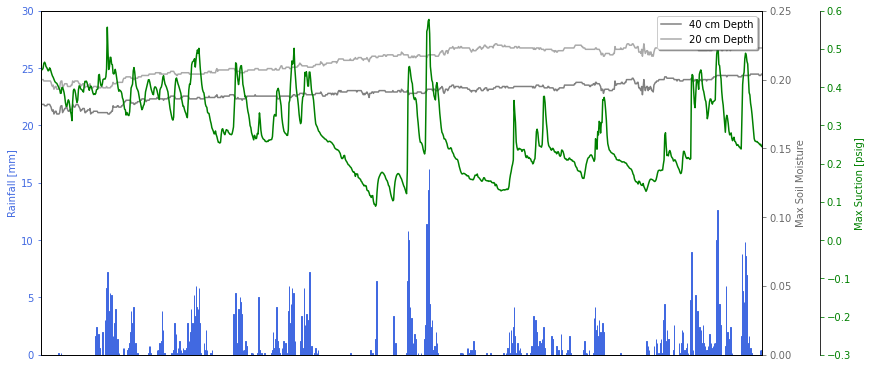

In [ ]:
fig, ax2 = plt.subplots(figsize=(12,5), layout='constrained')
fig.patch.set_facecolor('white')
#fig.suptitle('USGS Harbor Mountain Data, 3 Hour Resample', fontweight='bold')

# ax2.set_title("Soil Pit 2")
ax2.bar(usgs_rain_df_3['Date_Time'], usgs_rain_df_3['usgs_rain_3'], alpha=1, edgecolor="royalblue")#, linewidth=.5, width=.8)
majorLocator   = MultipleLocator(200)
minorLocator   = MultipleLocator(20)
#ax2.xaxis.set_major_locator(majorLocator)
#ax2.xaxis.set_minor_locator(minorLocator)
ax2.set_ylabel("Rainfall [mm]")
ax2.set_ylim([0,30])
ax2.set_xlim([usgs_rain_df_3['Date_Time'].iloc[2500],usgs_rain_df_3['Date_Time'].iloc[3500]])

ax2b = ax2.twinx()
upper_vwc_2, = ax2b.plot(usgs_rain_df_3['Date_Time'], usgs_rain_df_3['sp2_vwc_40_max'], color='grey')#, linewidth=.5)
lower_vwc_2, = ax2b.plot(usgs_rain_df_3['Date_Time'], usgs_rain_df_3['sp2_vwc_20_max'], color='darkgrey')#, linewidth=.5)
ax2b.set_ylabel("Max Soil Moisture")
ax2b.set_ylim([0,.25])

ax2c = ax2.twinx()
ax2c.spines.right.set_position(("axes", 1.08))
ax2c.plot(usgs_rain_df_3['Date_Time'], usgs_rain_df_3['sp2_pp_max'], color='green')#, linewidth=.5)
ax2c.set_ylabel("Max Suction [psig]")
ax2c.set_ylim([-.3,.6])
ax2c.legend((upper_vwc_2, lower_vwc_2), ('40 cm Depth', '20 cm Depth'), loc='upper right', shadow=True)

ax2.yaxis.label.set_color("royalblue")
ax2b.yaxis.label.set_color("dimgrey")
ax2c.yaxis.label.set_color("green")
ax2.tick_params(axis='y', colors="royalblue")
ax2b.tick_params(axis='y', colors="dimgrey")
ax2c.tick_params(axis='y', colors="green")

ax2.set_xticks([])

plt.savefig('./sitka_data/comparison_figs/draw_over_usgs_all_data_legend_2020_cut.png')
plt.show()
plt.close()

In [14]:
usgs_rain_df_3['Date_Time'].iloc[-1]

'2023-03-21 21:00:00'

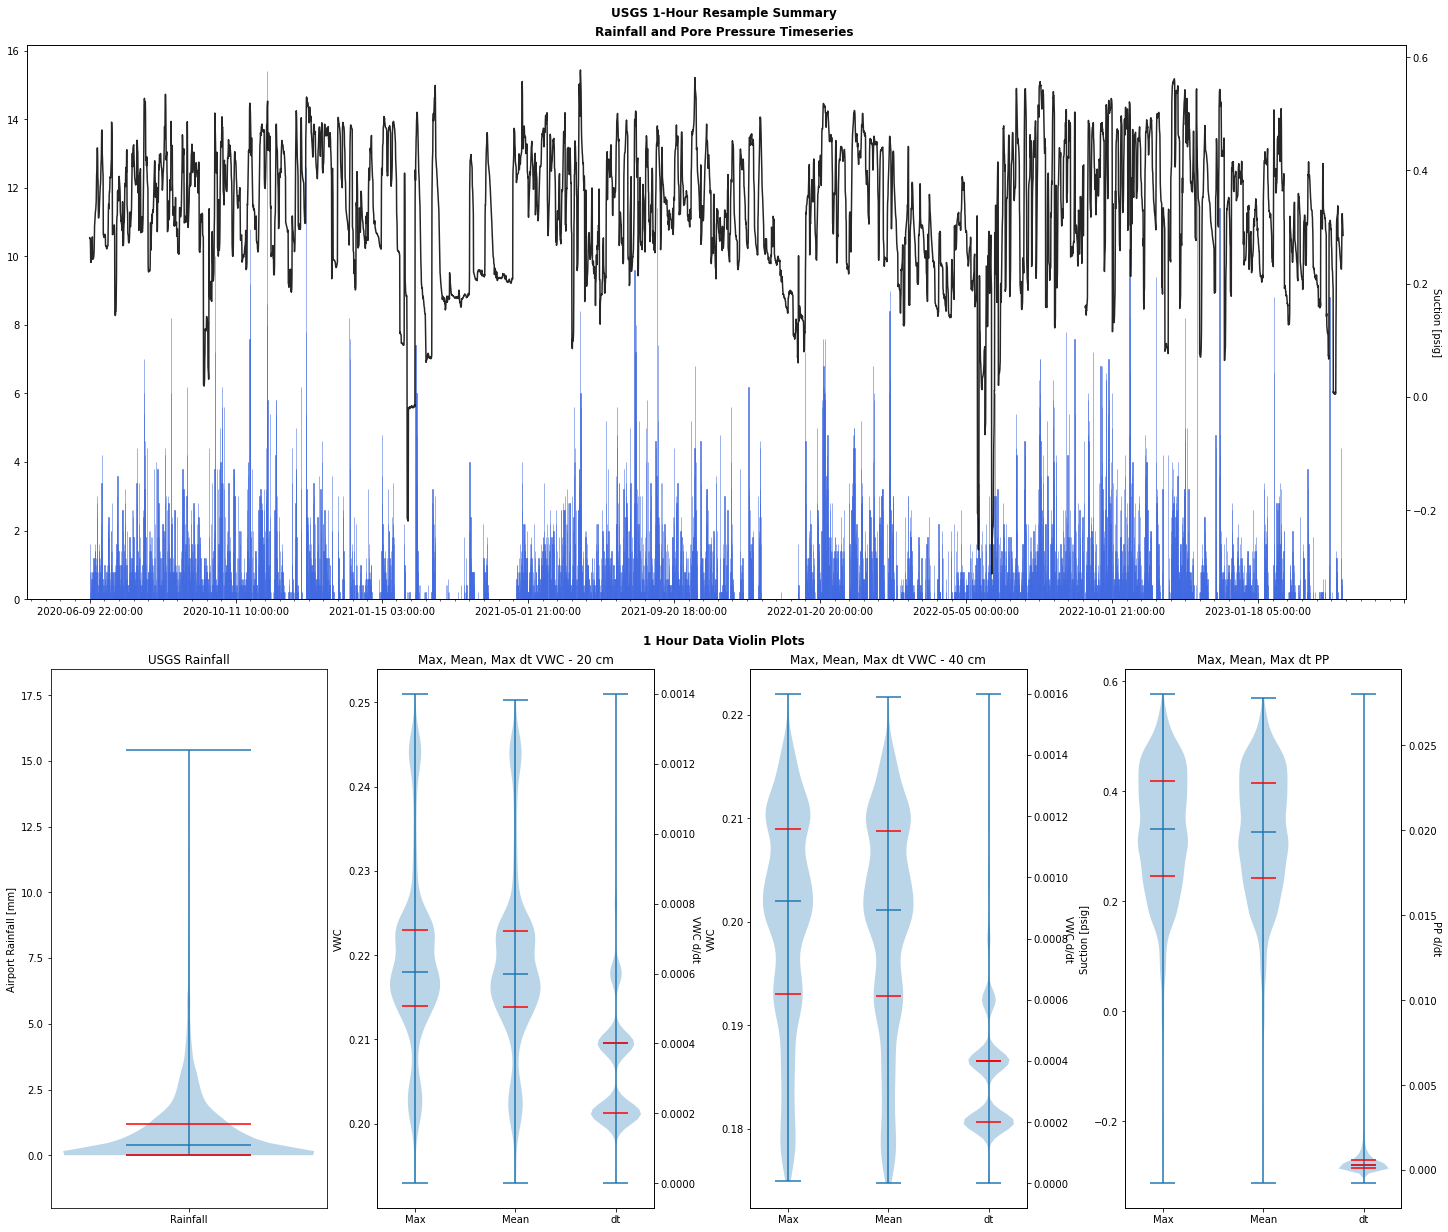

In [127]:
# box_size_1 = 18
# box_size_3 = 28
# box_size_6 = 45
# box_size_12 = 50

rows=2
cols_1=1
cols_2=4

fig = plt.figure(figsize =(20, 17), constrained_layout=True) 
fig.suptitle('USGS 1-Hour Resample Summary', fontweight="bold")

[row1, row2] = fig.subfigures(nrows=rows,ncols=cols_1)
ax1 = row1.subplots(nrows=1,ncols=cols_1)
[ax2, ax3, ax4, ax5] = row2.subplots(nrows=1,ncols=cols_2)

row1.suptitle('Rainfall and Pore Pressure Timeseries', fontweight="bold")
ax1.bar(combined_rain_df_1['Date_Time'], combined_rain_df_1['usgs_rain_1'], color='royalblue', edgecolor='royalblue', linewidth=0.5, zorder=1, alpha=1, width=0.8)
#ax1.set_title('Rainfall and Pore Pressure Timeseries'); ax1.set_ylabel("Rainfall [mm]"); ax1.set_xlabel("Date")

majorLocator   = MultipleLocator(720)
#majorFormatter = FormatStrFormatter('%d')
minorLocator   = MultipleLocator(72)

ax1.xaxis.set_major_locator(majorLocator)
#ax1.xaxis.set_major_formatter(majorFormatter)
ax1.xaxis.set_minor_locator(minorLocator)

ax1_5a = ax1.twinx()
ax1_5a.plot(combined_rain_df_1["Date_Time"], combined_rain_df_1["pp_max"], color='k', alpha=0.85, zorder=2)
ax1_5a.set_ylabel("Suction [psig]", rotation="-90")

# ax1_5b = ax1.twinx()
# ax1_5b.plot(combined_rain_df_1["Date_Time"], combined_rain_df_1["vwc_40_max"])
# ax1_5b.plot(combined_rain_df_1["Date_Time"], combined_rain_df_1["vwc_20_max"])
#ax1.set_xlim([0,box_size_1]); 
#ax1.set_ylim(top = np.max(combined_rain_df_1['usgs_rain_1']))

axis2 = ax2.violinplot(combined_rain_df_1["usgs_rain_1"], positions=[1], showmedians=True, quantiles=[0.25, 0.75])
ax2.set_title("USGS Rainfall"); ax2.set_ylabel("Airport Rainfall [mm]")
ax2.set_ylim([-2,1.2*np.max(combined_rain_df_1["usgs_rain_1"])])
ax2.set_xticks([1])
ax2.set_xticklabels(["Rainfall"])
axis2['cquantiles'].set_color('r')

axis3 = ax3.violinplot(combined_rain_df_1[["vwc_20_max","vwc_20_mean"]].dropna(), positions=[1,2], showmedians=True, quantiles=[[0.25, 0.75], [0.25, 0.75]])
ax3.set_title("Max, Mean, Max dt VWC - 20 cm"); ax3.set_ylabel("VWC")
#ax3.set_ylim([-np.max(combined_rain_df_1["vwc_20_mean"]),np.max(combined_rain_df_1["vwc_20_mean"])])
ax3_5 = ax3.twinx()
axis3_5 = ax3_5.violinplot(combined_rain_df_1["vwc_20_dt"].dropna(), positions=[3], showmedians=True, quantiles=[0.25, 0.75])
ax3_5.set_ylabel("VWC d/dt", rotation="-90")
ax3.set_xticks((1, 2, 3))
ax3.set_xticklabels(("Max","Mean", "dt"))
axis3['cquantiles'].set_color('r')
axis3_5['cquantiles'].set_color('r')

row2.suptitle('1 Hour Data Violin Plots', fontweight="bold")
axis4 = ax4.violinplot(combined_rain_df_1[["vwc_40_max", "vwc_40_mean"]].dropna(), positions=[1,2], showmedians=True, quantiles=[[0.25, 0.75], [0.25, 0.75]])
ax4.set_title("Max, Mean, Max dt VWC - 40 cm"); ax4.set_ylabel("VWC")
#ax4.set_xlim([0,box_size_3]); ax4.set_ylim([0,box_size_3])
ax4_5 = ax4.twinx()
axis4_5 = ax4_5.violinplot(combined_rain_df_1["vwc_40_dt"].dropna(), positions=[3], showmedians=True, quantiles=[0.25, 0.75])
ax4_5.set_ylabel("VWC d/dt", rotation="-90")
ax4.set_xticks((1, 2, 3))
ax4.set_xticklabels(("Max","Mean", "dt"))
axis4['cquantiles'].set_color('r')
axis4_5['cquantiles'].set_color('r')

axis5 = ax5.violinplot(combined_rain_df_1[["pp_max", "pp_mean"]].dropna(), positions=[1,2], showmedians=True, quantiles=[[0.25, 0.75], [0.25, 0.75]])
ax5.set_title("Max, Mean, Max dt PP"); ax5.set_ylabel("Suction [psig]")
#ax5.set_xlim([0,box_size_3]); ax5.set_ylim([0,box_size_3])
ax5_5 = ax5.twinx()
axis5_5 = ax5_5.violinplot(combined_rain_df_1["pp_dt"].dropna(), positions=[3], showmedians=True, quantiles=[0.25, 0.75])
ax5_5.set_ylabel("PP d/dt", rotation="-90")
ax5.set_xticks((1, 2, 3))
ax5.set_xticklabels(("Max","Mean", "dt"))
axis5['cquantiles'].set_color('r')
axis5_5['cquantiles'].set_color('r')

# plt.savefig('./sitka_data/comparison_figs/1_hour_usgs_summary.png', dpi='figure')
# plt.savefig('./sitka_data/comparison_figs/1_hour_usgs_summary.pdf', dpi='figure')
plt.show()
plt.close()

<AxesSubplot:>

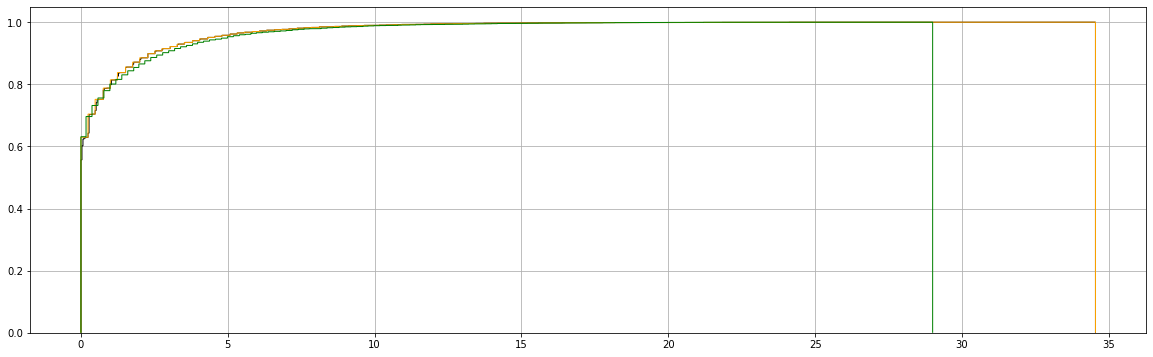

In [86]:
combined_rain_df_3['airport_rain_3'].hist(cumulative=True, histtype='step', density=1, color='black', bins=1000, figsize=(20,6))
combined_rain_df_3['airport_rain_3_mod'].hist(cumulative=True, histtype='step', density=1, color='orange', bins=1000, figsize=(20,6))
combined_rain_df_3['usgs_rain_3'].hist(cumulative=True, histtype='step', density=1, color='green', bins=1000, figsize=(20,6))

In [129]:
np.mean(combined_rain_df_1["vwc_40_dt"])

0.0003478373562287333